### Details
- Name : Arnav Agarwal
- Enrollment No. 23118009
- Batch : 2
- Branch : PI
- Sub-Batch : PI-1
- Subject : DAI-101

In [254]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Overview

In [255]:
data = pd.read_csv("apartments_for_rent_classified_100K.csv",sep=";", encoding='cp1252',low_memory=False)
data.head(5)

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


In [256]:
data.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

In [257]:
data.shape

(99492, 22)

In [258]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             99492 non-null  int64  
 1   category       99492 non-null  object 
 2   title          99492 non-null  object 
 3   body           99492 non-null  object 
 4   amenities      83448 non-null  object 
 5   bathrooms      99429 non-null  float64
 6   bedrooms       99368 non-null  float64
 7   currency       99492 non-null  object 
 8   fee            99492 non-null  object 
 9   has_photo      99492 non-null  object 
 10  pets_allowed   39068 non-null  object 
 11  price          99491 non-null  float64
 12  price_display  99491 non-null  object 
 13  price_type     99492 non-null  object 
 14  square_feet    99492 non-null  int64  
 15  address        7943 non-null   object 
 16  cityname       99190 non-null  object 
 17  state          99190 non-null  object 
 18  latitu

In [259]:
data.isna().sum()

id                   0
category             0
title                0
body                 0
amenities        16044
bathrooms           63
bedrooms           124
currency             0
fee                  0
has_photo            0
pets_allowed     60424
price                1
price_display        1
price_type           0
square_feet          0
address          91549
cityname           302
state              302
latitude            25
longitude           25
source               0
time                 0
dtype: int64

In [260]:
data.duplicated().sum()

84

# Data Cleaning

Removing Duplicate Values

In [261]:
data.drop_duplicates(inplace=True)

Removing Columns with High Cordinality

In [262]:
data.drop(columns=["amenities","pets_allowed","address"],inplace=True)

Removing Columns with NaN values

In [263]:
data.dropna(inplace=True)

Fixing Category Column

In [264]:
data["category"].unique()

array(['housing/rent/apartment', 'housing/rent/home',
       'housing/rent/short_term', 'housing/rent', 'housing/rent/condo',
       'housing/rent/other', 'housing/rent/commercial/retail'],
      dtype=object)

In [265]:
data["category"] = data["category"].str.split("/").str[-1]

Removing Columns with Low Cordinality

In [266]:
# Removing Currency column as it only has 1 unique value
data.drop(columns="currency",inplace=True)

Cleaning Outliers in Bathrooms and Bedrooms Columns

In [267]:
data = data[data["bathrooms"] < 4.0]
data = data[data["bedrooms"] < 5.0]

Removing Outliers from Price Column

In [268]:
data = data[data["price"].between(data["price"].quantile(0.01),data["price"].quantile(0.75))]

Removing Outliers from Square_feet Column

In [269]:
data = data[data["square_feet"].between(data["square_feet"].quantile(0.01),data["square_feet"].quantile(0.75))]

# Univariate Analysis

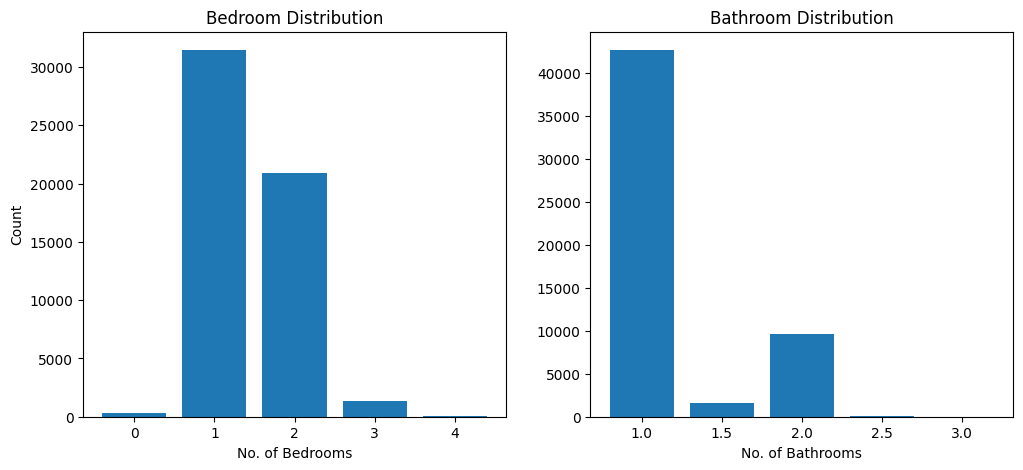

In [272]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.bar(x=data["bedrooms"].value_counts().index,height=data["bedrooms"].value_counts())
plt.xlabel("No. of Bedrooms")
plt.ylabel("Count")
plt.title("Bedroom Distribution")

plt.subplot(1,2,2)
plt.bar(x=data["bathrooms"].value_counts().index,height=data["bathrooms"].value_counts(),width=0.4)
plt.xlabel("No. of Bathrooms")
plt.title("Bathroom Distribution")

plt.show()

Text(0.5, 1.0, 'Distribution of People with Photos')

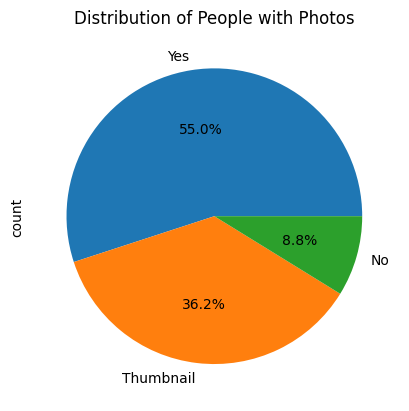

In [273]:
data["has_photo"].value_counts().plot.pie(autopct="%1.1f%%")
plt.title("Distribution of People with Photos")

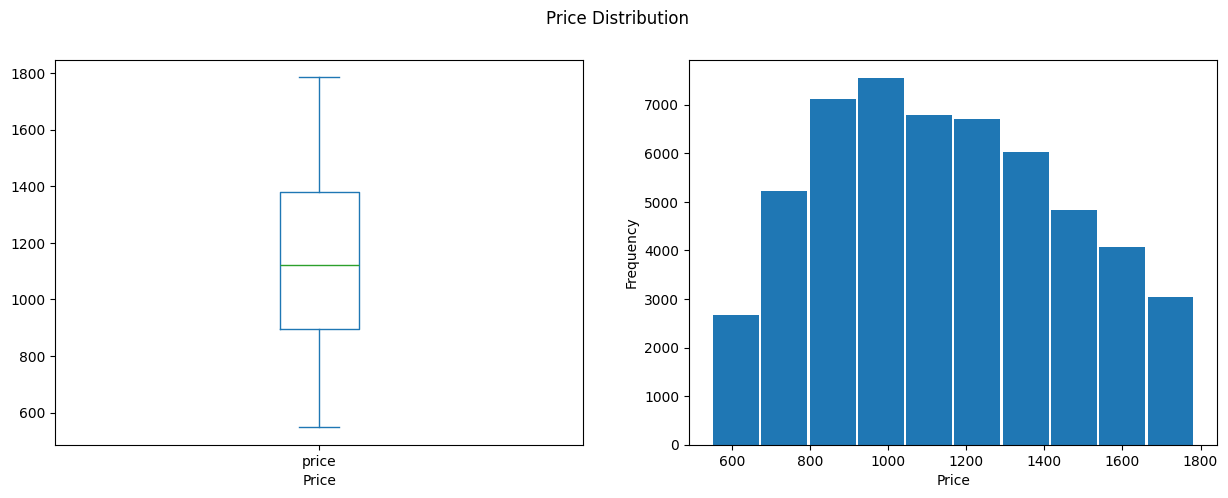

In [274]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
data["price"].plot.box()
plt.xlabel("Price")

plt.subplot(1,2,2)
data["price"].plot.hist(rwidth=0.95)
plt.xlabel("Price")

plt.suptitle("Price Distribution")
plt.show()

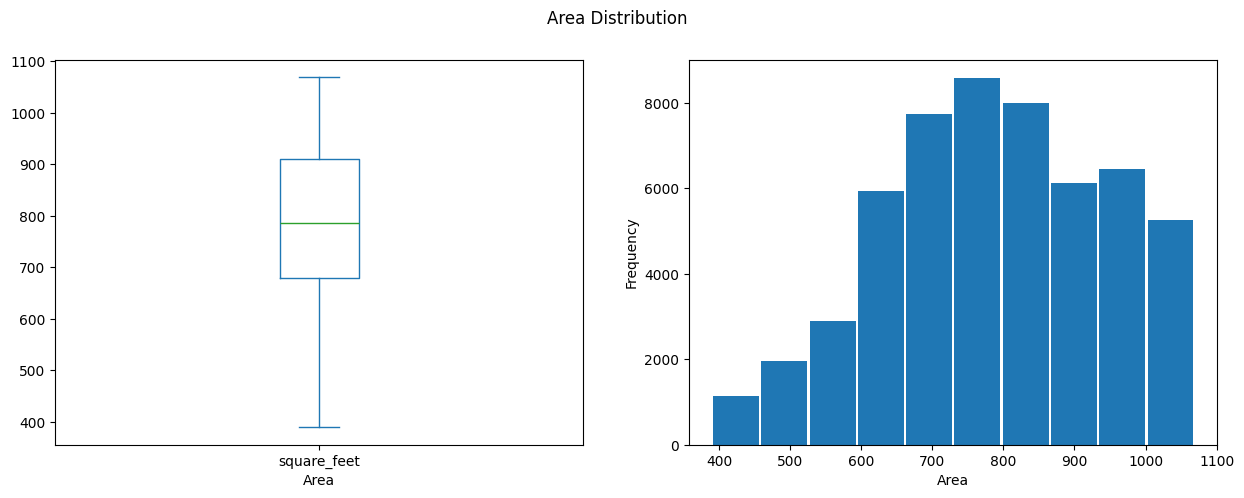

In [275]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
data["square_feet"].plot.box()
plt.xlabel("Area")

plt.subplot(1,2,2)
data["square_feet"].plot.hist(rwidth=0.95)
plt.xlabel("Area")

plt.suptitle("Area Distribution")
plt.show()

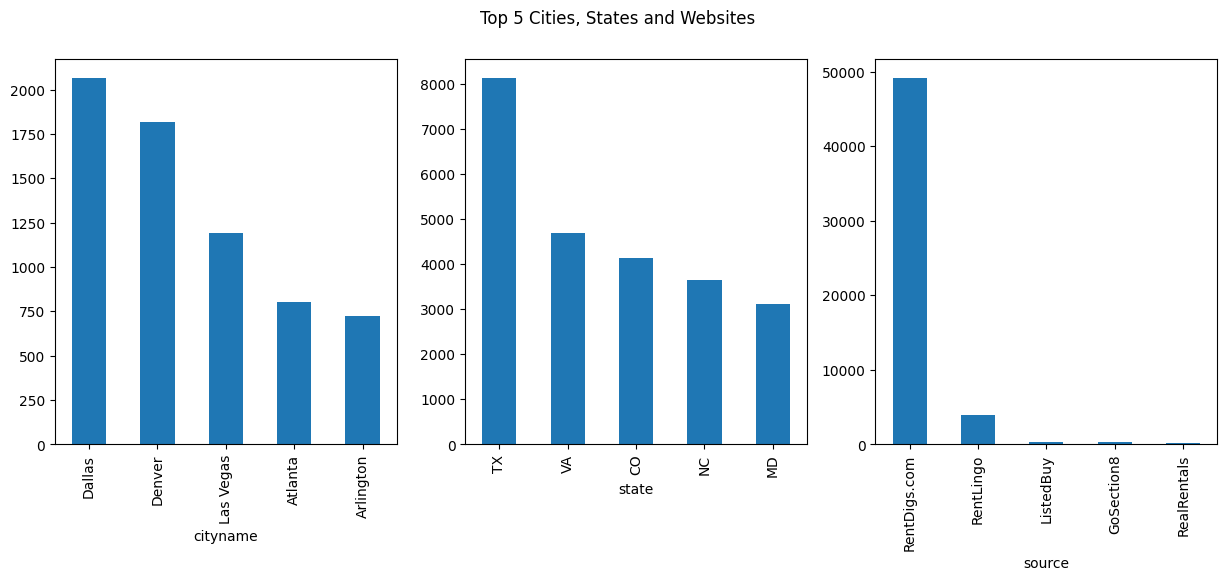

In [333]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
data["cityname"].value_counts()[:5].plot.bar()

plt.subplot(1,3,2)
data["state"].value_counts()[:5].plot.bar()

plt.subplot(1,3,3)
data["source"].value_counts()[:5].plot.bar()

plt.suptitle("Top 5 Cities, States and Websites")
plt.show()

# Bivariate Analysis

Analysis of Area and Price if there is any photo

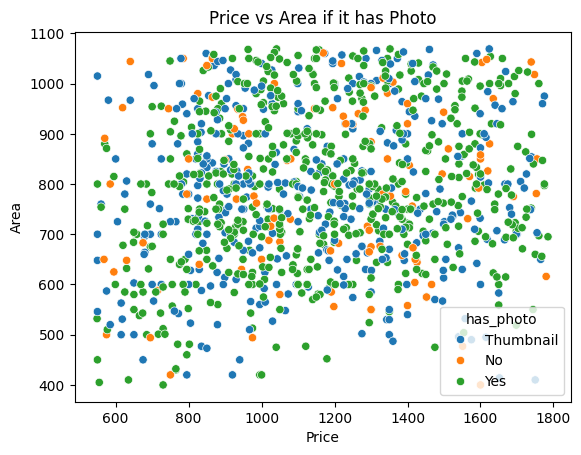

In [315]:
plt.title("Price vs Area if it has Photo")
sns.scatterplot(data[::50],x="price",y="square_feet",hue="has_photo")
plt.xlabel("Price")
plt.ylabel("Area")
plt.show()

P-value test

In [324]:
from scipy.stats import ttest_ind
ttest_ind(data["bathrooms"],data["bedrooms"])

TtestResult(statistic=-80.655426149798, pvalue=0.0, df=108066.0)

Bedrooms and bathrooms are highly significant

Expensive cities to rent home

In [357]:
data.groupby("cityname").price.sum().sort_values(ascending=False)[:5]

cityname
Denver       2495919.0
Dallas       2319372.0
Las Vegas    1162636.0
Atlanta      1069710.0
Arlington     871017.0
Name: price, dtype: float64

In [356]:
data.groupby("cityname").id.count().sort_values(ascending=False)[:5]

cityname
Dallas       2067
Denver       1815
Las Vegas    1192
Atlanta       802
Arlington     726
Name: id, dtype: int64

<Axes: ylabel='price'>

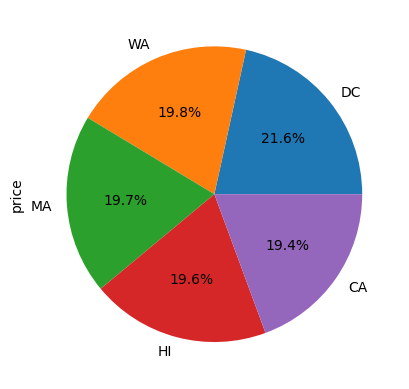

In [361]:
data.groupby("state").price.mean().sort_values(ascending=False)[:5].plot.pie(autopct="%1.1f%%")

# Inference

Max No. of houses rented have 1 bedroom and 1 bathroom

Avg rent price is $1142

Average House Area is 788 sq metre

Majority houses are rented in Dallas,Texas.

Major source is RentDigs.com

Most Expensive City to live in is Denver with an average rent of $ 1375

Most Expensive State to live in is DC with an average rent of $1585